#### using numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

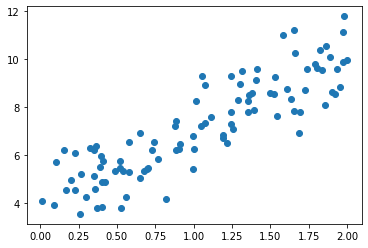

In [3]:
plt.scatter(X, y)

### Methods of Regularization
- Reduce Number of Polynomial Degree by constaining weights- Ridge, Lasso, Elastic Regression
- Early Stopping

### Ridge Regression (or Tikhonov Regularization)
A Regularization Term **alpha\*Summation(theta_i^2)** is added to the Cost Function. This forces the algorithm to keep the weights as small as possible.

Note- The Regularization Term should only be added during training. Once trained, unregularized models performance measure should be used to evaluate.

More the value of alpha, lesser will be the weights.

Note- The Bias term theta0 is not regularized.

**1/2\*(||w||)^2**. Where ||w|| is also called as **L2 Norm**.

Where **w** is feature vector (theta1 to thetan)

for Gradient Descent just add alpha\*w to MSE

#### With Closed Form Equation

**Theta = (X.XT + alpha\*A)^-1.XT.y**

Where A is (n+1).(n+1) identity matrix

In [4]:
from sklearn.linear_model import Ridge

In [5]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [6]:
ridge_reg.predict([[1.5]])

array([[8.53154825]])

#### With Stochastic Descent

In [8]:
from sklearn.linear_model import SGDRegressor

In [9]:
sgd_reg = SGDRegressor(penalty='l2')  # Penalty l2 add the regularization term
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [10]:
sgd_reg.predict([[1.5]])

array([8.65525106])

### Lasso Regression
**Least Absolute Shrinkage and Selection Operator Regression**

Simillar to Ridge just instead of l2 norm it usses l1 norm

**alpha\*Summation(|theta_i|)**  (Modulas)

Lasso tends to eliminate weights of least important feature (set them close to 0) i.e. automatic feature selection. The theta might bounce around so gradully reducing the learning rate helps in reaching the Optimal Parameters.

l1 norm is non differentiable at theta_i=0, but gradient descent still works if we use subgradient vector **g** instead when theta_i = 0

In [11]:
from sklearn.linear_model import Lasso

In [12]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [13]:
lasso_reg.predict([[1.5]])

array([8.4365343])

### Elastic Net

It is the middle ground between Ridge and Lasso Regularization. The regularization term is a simple mix of both Ridge and Lasso's Regularization and the mixed ratio can be controlled by changing **r**.

**Cost = MSE + r\*alpha\*Summation(|theta_i|) + ((1-r)/2)\*alpha\*Summation(theta_i^2)**

- If r=0 => Ridge Regularization
- If r=1 => Lasso Regularization

In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [16]:
elastic_net.predict([[1.5]])

array([8.33521009])

#### When to use what?
- Using a little Regularization is always recommended
- Ridge is Good Default
- Lasso or Elastic is Good if useless features'
- Elastic Net is preffered over Lasso as Lasso might behave erratically when the number of features is greater than the number of training Instances or when several features are strongly correlated.

### Least Angle Regression (LARS)

In [17]:
from sklearn.linear_model import Lars

In [18]:
lars_reg = Lars(n_nonzero_coefs=1)

In [19]:
lars_reg.fit(X, y)

Lars(n_nonzero_coefs=1)

In [20]:
lars_reg.coef_

array([3.02468689])

In [21]:
lars_reg.predict([[1.5]])

array([8.5710732])